In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def grab_cut(img, mask):

    mask[mask == 0] = cv2.GC_BGD
    mask[mask == 100] = cv2.GC_PR_BGD
    mask[mask == 200] = cv2.GC_PR_FGD
    mask[mask == 255] = cv2.GC_FGD

    mask = np.reshape(mask, (mask.shape[0], mask.shape[1],))

    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    img, bgdModel, fgdModel = cv2.grabCut(img, mask, None, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_MASK)

    return np.where((mask == 2) | (mask == 0), 0, 255).astype('uint8')

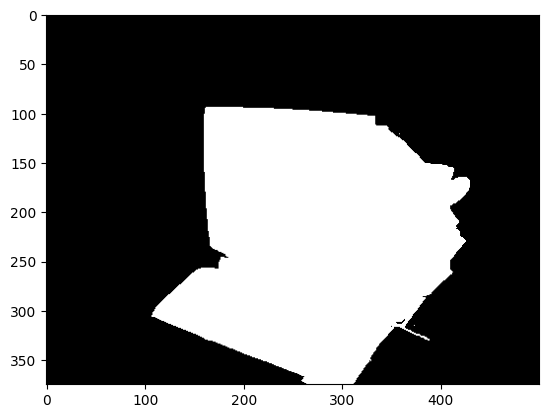

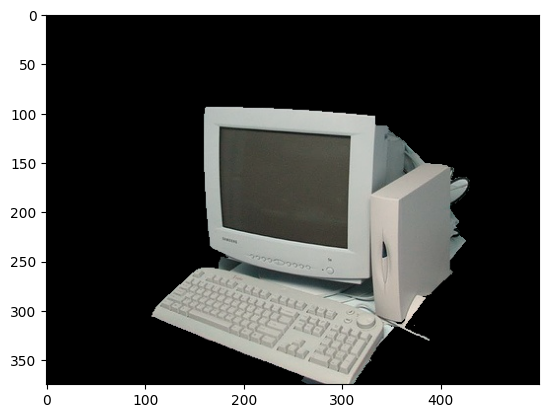

In [5]:
mask = cv2.imread('grabcut/2007_000039.png', cv2.IMREAD_GRAYSCALE)
image = cv2.imread('grabcut/2007_000039.jpg')

gc_mask = grab_cut(image, mask)
plt.imshow(gc_mask, 'gray')
plt.show()

plt.imshow(cv2.bitwise_and(image, image, mask=gc_mask))